<big> Here we build a <b>feedforward Neural Network</b> made up of <b>Fully Connected</b> layers (called <b>Dense</b> layers in Keras)<br>

# Introduction to MNIST

The **MNIST** (Modified National Institute of Standards and Technology) dataset is a classic benchmark in the field of machine learning and computer vision. It consists of:

- **60,000** training images
- **10,000** test images
- All are **grayscale** handwritten digits from **0 to 9**
- Each image is **28x28 pixels**

### Why MNIST?

MNIST is widely used for:

- Learning and prototyping image classification models
- Exploring neural network architectures


It's a great starting point for building and training deep learning models using fully connected or convolutional neural networks.

In [32]:
# Usual libraries
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from keras.layers import Dense, Input
# library useful for preprocessing
from tensorflow.keras.utils import to_categorical



# Load and inspect MNIST dataset <br>
The MNIST dataset is included in **TensorFlow**, we can retrieve it from TF:

In [33]:
# 1. Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess: Flatten images and normalize to [0, 1]
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0


In [34]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
# Convert to one-hot encoding
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

y_train[0], y_train_oh[0]

(np.uint8(5), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

### Data inspection


In [36]:
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (60000, 784)
Test set shape: (10000, 784)


In [37]:
# Show class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution (train):")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

Class distribution (train):
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


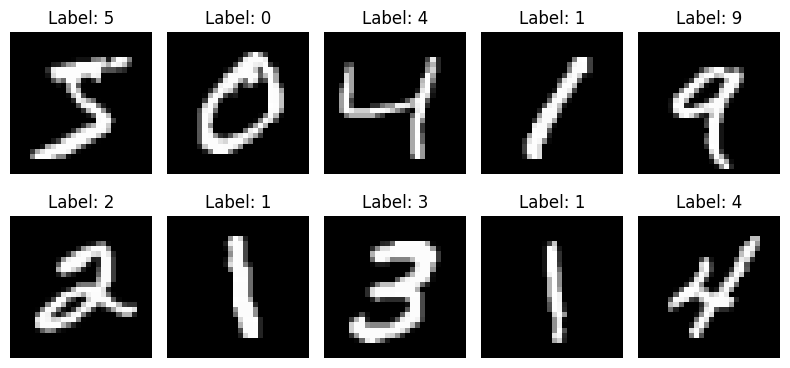

In [38]:
# Show a few sample images
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Build and train my network
Neural network made up of only FullyConnected layers (or Dense layers)<br>
The TensorFlow implementation is very fast during training and it is very easy to generalize<br>

Try to:
<ul>
<li> Change the hidden layer size and study the effect [(2), (5), (10), (25)]</li>
<li> Add more layers. For example add the line "Dense(5, activation="relu")," after the first Dense layer</li>
<li> Add Early Stopping</li>
<li> Change activation function of hidden layers: sigmoid -> relu</li>
</ul>


In [39]:
model = models.Sequential([
    Input(shape=(784,)),
    # build your model here :) (using dense layers, caution on output layer activation function and number of neurons)
    Dense(128,"relu"),
    Dense(10,"softmax")
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


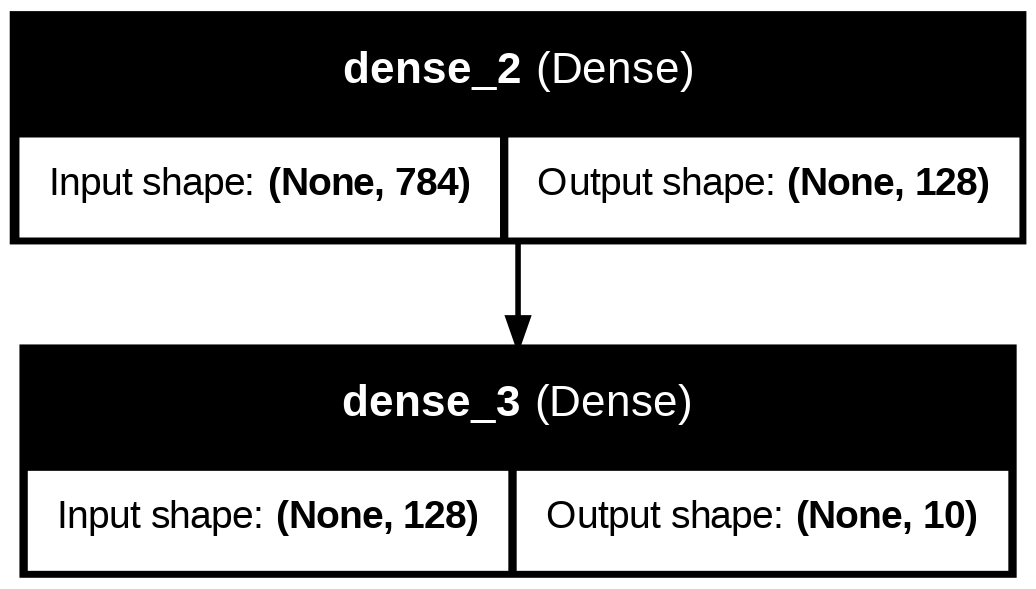

In [40]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [41]:
# Start my training -
batches, epoche, pazienza = 32, 20, 5
storia = model.fit(x_train, y_train_oh,
          epochs=epoche,
          batch_size=batches,
          validation_split=0.1)

print("\n",storia.history.keys())

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8730 - loss: 0.4506 - val_accuracy: 0.9685 - val_loss: 0.1178
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9613 - loss: 0.1350 - val_accuracy: 0.9733 - val_loss: 0.0923
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9750 - loss: 0.0862 - val_accuracy: 0.9778 - val_loss: 0.0789
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9824 - loss: 0.0589 - val_accuracy: 0.9770 - val_loss: 0.0779
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0444 - val_accuracy: 0.9782 - val_loss: 0.0805
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9787 - val_loss: 0.0863
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9772 - val_loss: 0.0826
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9936 - loss: 0.0212 

# Plots of training history and test my network

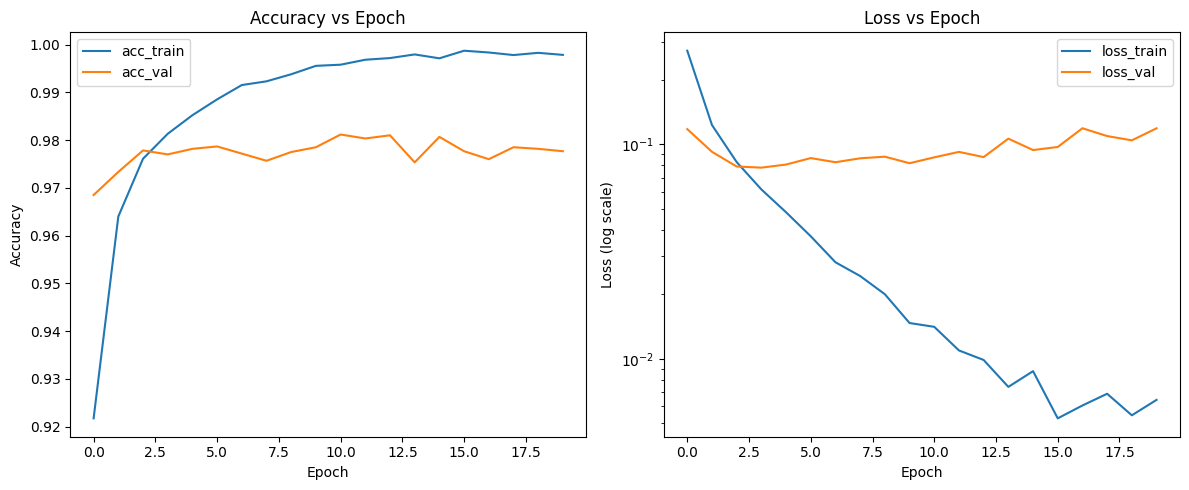

In [42]:
"""################################################### Plots ####################################################"""

loss_train = storia.history["loss"]
loss_val = storia.history["val_loss"]
acc_train = storia.history["accuracy"]
acc_val = storia.history["val_accuracy"]

# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Accuracy on the first axis (ax1)
ax1.plot(range(len(acc_train)), acc_train, label="acc_train")
ax1.plot(range(len(acc_val)), acc_val, label="acc_val")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Epoch')
ax1.legend()

# Plot Loss on the second axis (ax2)
ax2.plot(range(len(loss_train)), loss_train, label="loss_train")
ax2.plot(range(len(loss_val)), loss_val, label="loss_val")
ax2.set_yscale('log')  # Log scale for loss
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (log scale)')
ax2.set_title('Loss vs Epoch')
ax2.legend()

plt.tight_layout()


#plt.savefig("Loss_Accuracy_Ising2d.png")

# Show the plot
plt.show()



In [44]:
"""################################################### Test ####################################################"""
# Evaluate the model on the test set

test_loss, test_acc = model.evaluate(x_test, y_test_oh)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9730 - loss: 0.1365
Test accuracy: 0.9760


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


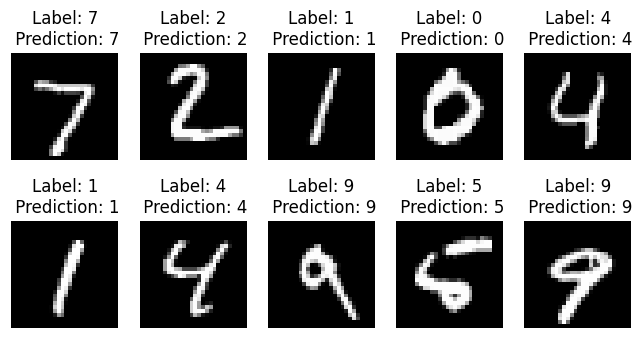

In [50]:
predictions = model.predict(x_test)
# Show a few sample images - predicted vs real labels
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_test[i]}\n Prediction: {np.argmax(predictions[i])}")
    plt.axis("off")

plt.show()